In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

%matplotlib inline

In [2]:
restaurants_df = pd.read_csv('LA_rest_inspects', delimiter = '\t', header = 0, index_col = False,
                             names = ['facility', 'last_inspect_date','inspect_score', 'descript',
                                      'address', 'city', 'zip', 'phone'])

In [3]:
for col in restaurants_df:
    try:
        restaurants_df[col] = restaurants_df[col].map(str.strip)
    except:
        restaurants_df[col] = restaurants_df[col]

In [4]:
restaurants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50657 entries, 0 to 50656
Data columns (total 8 columns):
facility             50657 non-null object
last_inspect_date    50657 non-null object
inspect_score        50657 non-null float64
descript             50657 non-null object
address              50657 non-null object
city                 50657 non-null object
zip                  50657 non-null object
phone                23678 non-null object
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [5]:
restaurants_df.groupby('descript', as_index = False).agg({'city': 'count'})

descript  city
0         FOOD MKT RETAIL (2,000+ SF) HIGH RISK   609
1          FOOD MKT RETAIL (2,000+ SF) LOW RISK  2822
2     FOOD MKT RETAIL (2,000+ SF) MODERATE RISK   264
3       FOOD MKT RETAIL (25-1,999 SF) HIGH RISK  1733
4        FOOD MKT RETAIL (25-1,999 SF) LOW RISK  8219
5   FOOD MKT RETAIL (25-1,999 SF) MODERATE RISK   528
6             RESTAURANT (0-30) SEATS HIGH RISK  8225
7              RESTAURANT (0-30) SEATS LOW RISK  2369
8         RESTAURANT (0-30) SEATS MODERATE RISK  8377
9           RESTAURANT (151 + ) SEATS HIGH RISK  2039
10           RESTAURANT (151 + ) SEATS LOW RISK   111
11      RESTAURANT (151 + ) SEATS MODERATE RISK   183
12           RESTAURANT (31-60) SEATS HIGH RISK  6383
13            RESTAURANT (31-60) SEATS LOW RISK   752
14       RESTAURANT (31-60) SEATS MODERATE RISK  1605
15          RESTAURANT (61-150) SEATS HIGH RISK  4996
16           RESTAURANT (61-150) SEATS LOW RISK   313
17      RESTAURANT (61-150) SEATS MODERATE RISK  1129

In [6]:
restaurants_df['rest_flag'] = restaurants_df['descript'].apply(lambda x: 1 if 'RESTAURANT' in x else 0)
restaurants_df.head()

facility last_inspect_date  inspect_score  \
0                103RD MARKET        01/18/2017           95.0   
1           TACOS LA POTRANKA        01/18/2017           85.0   
2                    FISHLAND        01/18/2017           97.0   
3            PRODUCE FOR LESS        01/18/2017           91.0   
4  TREE HOUSE THAI RESTAURANT        01/18/2017           92.0   

                                  descript                    address  \
0   FOOD MKT RETAIL (25-1,999 SF) LOW RISK            1922 E 103RD ST   
1        RESTAURANT (0-30) SEATS HIGH RISK     1501 N LONG BEACH BLVD   
2  FOOD MKT RETAIL (25-1,999 SF) HIGH RISK         510 W COMPTON BLVD   
3    FOOD MKT RETAIL (2,000+ SF) HIGH RISK           5059 MELROSE AVE   
4       RESTAURANT (31-60) SEATS HIGH RISK  10200 VENICE BLVD STE 207   

          city         zip         phone  rest_flag  
0  LOS ANGELES       90002  323-563-6245          0  
1      COMPTON  90221-1608  323-928-1229          1  
2      COMPTON       90220  310-669-3050          0  
3  LOS ANGELES  90038-4115  323-466-2966          0  
4  CULVER CITY       90232           NaN          1

In [7]:
restaurants_df = restaurants_df[restaurants_df['rest_flag'] == 1]

In [8]:
restaurants_df = restaurants_df.drop('rest_flag', axis = 1)
restaurants_df.head()

facility last_inspect_date  inspect_score  \
1           TACOS LA POTRANKA        01/18/2017           85.0   
4  TREE HOUSE THAI RESTAURANT        01/18/2017           92.0   
5              JUAN POLLO #44        01/18/2017           96.0   
6          TOM'S JR BURGER #8        01/18/2017           94.0   
7       POPEYES CHICKEN #3088        01/18/2017           97.0   

                              descript                    address  \
1    RESTAURANT (0-30) SEATS HIGH RISK     1501 N LONG BEACH BLVD   
4   RESTAURANT (31-60) SEATS HIGH RISK  10200 VENICE BLVD STE 207   
5   RESTAURANT (31-60) SEATS HIGH RISK           2233 N GAREY AVE   
6  RESTAURANT (61-150) SEATS HIGH RISK     1725 N LONG BEACH BLVD   
7   RESTAURANT (31-60) SEATS HIGH RISK         300 W COMPTON BLVD   

          city         zip         phone  
1      COMPTON  90221-1608  323-928-1229  
4  CULVER CITY       90232           NaN  
5       POMONA       91767  909-392-9794  
6      COMPTON       90221  562-355-5322  
7      COMPTON       90220           NaN

In [9]:
restaurants_df['seat_range'] = restaurants_df['descript'].str.extract('RESTAURANT \((.+)\)', expand = True)

In [10]:
restaurants_df['risk_level'] = restaurants_df['descript'].str.extract('\) SEATS (.+) RISK', expand = True)

In [11]:
restaurants_df['zip_cd'] = restaurants_df['zip'].str.extract('(\d{5})', expand = True)

In [12]:
restaurants_df = restaurants_df[['facility', 'last_inspect_date', 'inspect_score', 'address',
                                'city', 'seat_range', 'risk_level', 'zip_cd']]

In [13]:
try:
    for zip_ in restaurants_df['zip_cd']:
        int(zip_)
except:
    print zip_

nan


In [14]:
restaurants_df = restaurants_df.dropna(axis = 0)

In [15]:
restaurants_df['zip_cd'] = restaurants_df['zip_cd'].astype('int')

In [16]:
for zip_ in restaurants_df['zip_cd']:
    if zip_ < 90000:
        print zip_

12082


In [17]:
restaurants_df = restaurants_df[restaurants_df['zip_cd'] > 90000]

In [18]:
restaurants_df = restaurants_df.groupby(['facility', 'address', 'city', 'seat_range', 'risk_level', 'zip_cd'], 
                                        as_index = False).agg({'last_inspect_date': 'max',
                                                               'inspect_score': 'mean'})

In [19]:
rest_cities = restaurants_df.groupby('city', as_index = False).agg({'facility': 'count'})

In [20]:
rest_cities_sort = rest_cities.sort_values('facility', ascending = False)

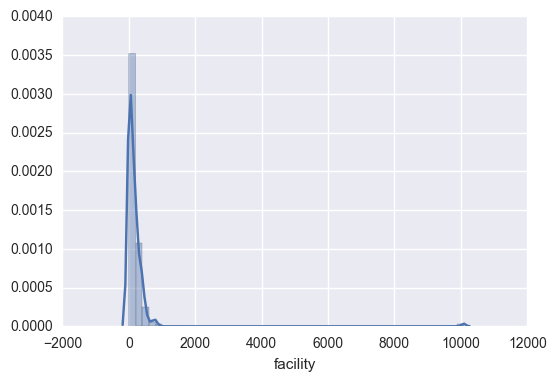

In [21]:
sns.distplot(rest_cities_sort['facility'])
plt.show()
# far too many places with a small amount of restaurants

In [22]:
small_scope = []
rest_cities_sort['rest_flag'] = rest_cities_sort['facility'].apply(lambda x: 1 if x > 100 else 0)
rest_cities_sort['rest_flag'].sum()

88

In [23]:
rest_cities_scope = rest_cities_sort[rest_cities_sort['rest_flag'] == 1.0]

In [24]:
rest_scope = []
for rest in rest_cities_scope['city']:
    rest_scope.append(rest)

In [25]:
def narrow_rest_scope_by_city(x):
    if x in rest_scope:
        return 1
    else:
        return 0

restaurants_df['scope_flag'] = restaurants_df['city'].apply(narrow_rest_scope_by_city)

In [26]:
restaurants_df = restaurants_df[restaurants_df['scope_flag'] == 1.0]

In [27]:
restaurants_df = restaurants_df.drop('scope_flag', axis = 1)

In [28]:
rest_facil_dict = restaurants_df.groupby('address').groups

In [29]:
for key, value in rest_facil_dict.items():
    index_list = []
    for index_num in value:
        index_num = restaurants_df.ix[index_num]['facility']
        index_list.append(index_num)
    rest_facil_dict[key] = index_list

In [ ]:
airport = ['BOB HOPE','BURBANK','LAX']
club = ['BRENTWOOD COUNTRY CLUB','CALIFORNIA CLUB','JONATHAN CLUB']
education = ['CSU DOMINGUEZ','AZUZA PACIFIC UNIVERSITY','CAL STATE LA','CAL STATE NORTHRIDGE',
             'CERRITOS COLLEGE','LMU','PEPPEREDINE','USC','SANTA MONICA COLLEGE']


In [86]:
for key, value in backup.items():
    if 'HOTEL' in str(value):
        save_this = key
        

9750 AIRPORT BLVD
506 S GRAND AVE
9200 W SUNSET BLVD
711 S HOPE ST
21850 OXNARD ST
6121 SUNSET BLVD
9641 SUNSET BLVD
701 STONE CANYON RD
929 S BROADWAY ST
900 W OLYMPIC BLVD
9500 WILSHIRE BLVD
5855 W CENTURY BLVD
6225 W CENTURY BLVD
3635 FASHION WAY
225 N CANON DR
1020 N SAN VICENTE BLVD
530 PICO BLVD
888 BICYCLE CASINO DR
1700 OCEAN AVE
9876 WILSHIRE BLVD
2025 AVENUE OF THE STARS
930 HILGARD AVE
431 W 7TH ST
648 S BROADWAY
6101 W CENTURY BLVD
3515 WILSHIRE BLVD
9901 S LA CIENEGA BLVD
5711 W CENTURY BLVD
9201 SUNSET BLVD
1910 OCEAN FRONT WALK
3883 W CENTURY BLVD
1440 E IMPERIAL AVE


In [88]:
backup = {'1 LMU DR #MS 8420': ['LMU - EDUCATION'],
 '100 WORLD WAY': ['LAX'],
 '1000 E VICTORIA ST': ['CSU DOMINGUEZ - EDUCATION'],
 '1000 VIN SCULLY AVE': ['DODGER STADIUM - ENTERTAINMENT'],
 '1020 N SAN VICENTE BLVD': ['LONDON - HOTEL'],
 '1050 S HILL ST': ['BELASCO - ENTERTAINMENT'],
 '10861 WEYBURN AVE': ['RALPHS - GROCERY'],
 '1101 W MCKINLEY AVE': ['FAIRPLEX - ENTERTAINMENT'],
 '11030 W JEFFERSON BLVD': ['PAVILLIONS - GROCERY'],
 '111 RAGING WATERS DR': ['RAGING WATER LA - ENTERTAINMENT'],
 '1110 W ALAMEDA AVE': ['PAVILLIONS - GROCERY'],
 '1111 S FIGUEROA ST': ['STAPLES - ENTERTAINMENT'],
 '11110 E ALONDRA BLVD': ['CERRITOS COLLEGE - EDUCATION'],
 '1201 S FIGUEROA ST': ['LA CONVENTION CENTER - ENTERTAINMENT'],
 '12746 W JEFFERSON BLVD': ['WHOLE FOODS - GROCERY'],
 '135 N GRAND AVE': ['MUSIC CENTER - ENTERTAINMENT'],
 '14049 VENTURA BLVD': ['RALPHS - GROCERY'],
 '1440 E IMPERIAL AVE': ['EMBASSY SUITES - HOTEL'],
 '1525 E AMAR RD': ['SEAFOOD CITY SUPERMARKET - GROCERY'],
 '16550 SOLEDAD CANYON RD': ['VONS - GROCERY'],
 '1700 OCEAN AVE': ['LOEWS HOTEL - HOTEL'],
 '18111 NORDHOFF ST': ['CAL STATE NORTHRIDGE - EDUCATION'],
 '18400 AVALON BLVD STE 300': ['STUBHUB CENTER - ENTERTAINMENT'],
 '18571 SOLEDAD CANYON RD': ['VALLARTA SUPERMARKET - GROCERY'],
 '1900 PICO BLVD': ['SANTA MONICA COLLEGE - EDUCATION'],
 '1910 OCEAN FRONT WALK': ['HOTEL CASA DEL MAR - HOTEL'],
 '200 WORLD WAY': ['LAX'],
 '2025 AVENUE OF THE STARS': ['HYATT REGENCY CENTURY PLAZA - HOTEL'],
 '21035 HAWTHORNE BLVD': ['SMART & FINAL - GROCERY'],
 '21080 GOLDEN SPRINGS DR': ['HANNAM - GROCERY'],
 '21850 OXNARD ST': ['MARRIOTT - HOTEL'],
 '225 LINCOLN BLVD': ['WHOLE FOODS - GROCERY'],
 '225 N CANON DR': ['MONTAGE - HOTEL'],
 '2301 N HIGHLAND AVE': ['HOLLYWOOD BOWL - ENTERTAINMENT'],
 '23381 MULHOLLAND DR': ['VONS - GROCERY'],
 '240 S DIAMOND BAR BLVD': ['GROCERY - GROCERY'],
 '24255 PACIFIC COAST HWY': ['PEPPEREDINE'],
 '2500 N HOLLYWOOD WAY': ['BURBANK - AIRPORT'],
 '2520 GLENDALE BLVD': ['WHOLE FOODS - GROCERY'],
 '260 S LA BREA AVE': ['RALPHS - GROCERY'],
 '26101 MAGIC MOUNTAIN PKWY': ['SIX FLAGS MAGIC MOUNTAIN - ENTERTAINMENT'],
 '2627 LINCOLN BLVD': ['ALBERTSONS - GROCERY'],
 '2627 N HOLLYWOOD WAY': ['BOB HOPE - AIRPORT'],
 '2700 N VERMONT': ['GREEK THEATER - ENTERTAINMENT'],
 '2701 N SEPULVEDA BLVD': ['MAGNIN AUDITORIUM - ENTERTAINMENT'],
 '27095 MCBEAN PKWY': ['PAVILLIONS - GROCERY'],
 '2725 HYPERION AVE': ['GELSONS - GROCERY'],
 '2740 W OLYMPIC BLVD': ['HANNAM - GROCERY'],
 '27931 KELLY JOHNSON PKWY': ['WALMART - GROCERY'],
 '2825 S DIAMOND BAR BLVD': ['H MART - GROCERY'],
 '285 W HUNTINGTON DR': ['SANTA ANITA PARK - ENTERTAINMENT'],
 '300 WORLD WAY': ['LAX'],
 '3400 S FIGUEROA ST': ['GALEN CENTER - ENTERTAINMENT'],
 '345 E MAIN ST': ['99 RANCH MARKET - GROCERY'],
 '3515 WILSHIRE BLVD': ['LINE HOTEL - HOTEL'],
 '3607 TROUSDALE PKWY': ['USC - EDUCATION'],
 '3635 FASHION WAY': ['MARRIOTT - HOTEL'],
 '380 SANTA MONICA PIER': ['PACIFIC PARK - ENTERTAINMENT'],
 '380 WORLD WAY': ['LAX'],
 '3830 W VERDUGO AVE': ['ALBERTSONS - GROCERY'],
 '3883 W CENTURY BLVD': ['HOLLYWOOD PARK CASINO - HOTEL'],
 '3900 W MANCHESTER BLVD': ['ARAMARK - ENTERTAINMENT'],
 '3911 S FIGUEROA ST': ['COLISEUM - ENTERTAINMENT'],
 '3939 S FIGUEROA ST': ['BANC OF CALIFORNIA STADIUM - ENTERTAINMENT'],
 '400 WORLD WAY': ['LAX'],
 '431 W 7TH ST': ['LAAC - HOTEL'],
 '4340 PACIFIC COAST HWY': ['SUPER H - GROCERY'],
 '4365 GLENCOE AVE': ['PAVILLIONS - GROCERY'],
 '448 S HILL ST': ['PERCH - RESTAURANT'],
 '500 N SEPULVEDA BLVD': ['RALPHS - GROCERY'],
 '506 S GRAND AVE': ['BILTMORE - HOTEL'],
 '5151 STATE UNIVERSITY DR': ['CAL STATE LA - EDUCATION'],
 '530 PICO BLVD': ['LE MERIDIEN - HOTEL'],
 '5333 ZOO DR': ['LA ZOO - ENTERTAINMENT'],
 '538 S FLOWER ST': ['CALIFORNIA CLUB - CLUB'],
 '545 S FIGUEROA ST': ['JONATHAN CLUB - CLUB'],
 '5711 W CENTURY BLVD': ['HILTON - HOTEL'],
 '5855 W CENTURY BLVD': ['MARRIOTT - HOTEL'],
 '590 S BURLINGAME AVE': ['BRENTWOOD COUNTRY CLUB - CLUB'],
 '600 WORLD WAY': ['LAX'],
 '6081 CENTER DR STE 201': ['CINEMARK - ENTERTAINMENT'],
 '6101 W CENTURY BLVD': ['SHERATON - HOTEL'],
 '6121 SUNSET BLVD': ['NEUEHOUSE - HOTEL'],
 '6215 SUNSET BLVD': ['HOLLYWOOD PALLADIUM - ENTERTAINMENT'],
 '6225 W CENTURY BLVD': ['HYATT - HOTEL'],
 '6360 W SUNSET BLVD': ['ARCLIGHT - ENTERTAINMENT'],
 '648 S BROADWAY': ['CLIFTONS - HOTEL'],
 '649 W JEFFERSON BLVD': ['SHRINE AUDITORIUM - ENTERTAINMENT'],
 '6600 TOPANGA CANYON BLVD': ['WESTFIELD TOPANGA - MALL'],
 '6801 HOLLYWOOD BLVD': ['DOLBY - ENTERTAINMENT'],
 '690 E HOLT AVE': ['CARDENAS - GROCERY'],
 '700 WORLD WAY': ['LAX'],
 '7000 HOLLYWOOD BLVD': ['ROOSEVELT'],
 '701 STONE CANYON RD': ['BEL AIR - HOTEL'],
 '711 S HOPE ST': ['SHERATON - HOTEL'],
 '745 W NAOMI AVE': ['VONS - GROCERY'],
 '760 S SEPULVEDA BLVD': ['WHOLE FOODS'],
 '770 S GRAND AVE': ['WHOLE FOODS - GROCERY'],
 '777 W CHICK HEARN CT': ['MICROSOFT THEATER - ENTERTAINMENT'],
 '800 W OLYMPIC BLVD': ['LA LIVE - ENTERTAINMENT'],
 '800 W OLYMPIC BLVD STE A335': ['CLUB NOKIA - ENTERTAINMENT'],
 '8225 SUNSET BLVD': ['PINK TACO - RESTAURANT'],
 '888 BICYCLE CASINO DR': ['BICYCLE HOTEL CASINO - HOTEL'],
 '900 W OLYMPIC BLVD': ['JW MARRIOTT HOTEL - HOTEL'],
 '901 E ALOSTA AVE': ['AZUZA PACIFIC UNIVERSITY - EDUCATION'],
 '910 LINCOLN BLVD': ['RALPHS - GROCERY'],
 '9200 W SUNSET BLVD': ['SOHO HOUSE - HOTEL'],
 '9201 SUNSET BLVD': ['9201 SUNSET BLVD - HOTEL'],
 '929 S BROADWAY ST': ['ACE - HOTEL'],
 '930 HILGARD AVE': ['W HOTEL - HOTEL'],
 '9500 WILSHIRE BLVD': ['FOUR SEASONS - HOTEL'],
 '9616 W PICO BLVD': ['RALPHS - GROCERY'],
 '9641 SUNSET BLVD': ['BEVERLY HILLS HOTEL - HOTEL'],
 '9750 AIRPORT BLVD': ['FOUR POINTS - HOTEL'],
 '9876 WILSHIRE BLVD': ['BEVERLY HILTON - HOTEL'],
 '9901 S LA CIENEGA BLVD': ['HOLIDAY INN - HOTEL'],
 '9990 LONG BEACH BLVD': ['GROCERY - GROCERY']}

In [84]:
len(backup)
len(event_facil_addresses)

117

In [36]:
event_facil_addresses = {'2627 N HOLLYWOOD WAY': ['BOB HOPE'],
                         '2500 N HOLLYWOOD WAY': ['BURBANK'],
                         '700 WORLD WAY': ['LAX'],
                         '600 WORLD WAY': ['LAX'],
                         '400 WORLD WAY': ['LAX'],
                         '380 WORLD WAY': ['LAX'],
                         '300 WORLD WAY': ['LAX'],
                         '200 WORLD WAY': ['LAX'],
                         '100 WORLD WAY': ['LAX'],
                         '538 S FLOWER ST': ['CALIFORNIA CLUB'],
                         '590 S BURLINGAME AVE' ['BRENTWOOD COUNTRY CLUB']
                         '545 S FIGUEROA ST': ['JONATHAN CLUB']
                         '1900 PICO BLVD': ['SANTA MONICA COLLEGE']
                         '1000 E VICTORIA ST': ['CSU DOMINGUEZ']
                         '901 E ALOSTA AVE': ['AZUZA PACIFIC UNIVERSITY']
                         '11110 E ALONDRA BLVD': ['CERRITOS COLLEGE']
                         '3607 TROUSDALE PKWY': ['USC']
                         '1 LMU DR #MS 8420': ['LMU']
                         '18111 NORDHOFF ST': ['CAL STATE NORTHRIDGE']
                         '5151 STATE UNIVERSITY DR': ['CAL STATE LA']
                         '24255 PACIFIC COAST HWY': ['PEPPEREDINE']
                         '240 S DIAMOND BAR BLVD': ['GROCERY'],
                         '770 S GRAND AVE': ['WHOLE FOODS'],
                         '27931 KELLY JOHNSON PKWY': ['WALMART'],
                         '2725 HYPERION AVE': ['GELSONS'],
                         '23381 MULHOLLAND DR': ['VONS'],
                         '690 E HOLT AVE': ['CARDENAS'],
                         '14049 VENTURA BLVD': ['RALPHS'],
                         '18571 SOLEDAD CANYON RD': ['VALLARTA SUPERMARKET'],
                         '345 E MAIN ST': ['99 RANCH MARKET'],
                         '1525 E AMAR RD': ['SEAFOOD CITY SUPERMARKET'],
                         '910 LINCOLN BLVD': ['RALPHS'],
                         '10861 WEYBURN AVE': ['RALPHS'],
                         '11030 W JEFFERSON BLVD': ['PAVILLIONS'],
                         '27095 MCBEAN PKWY': ['PAVILLIONS'],
                         '2740 W OLYMPIC BLVD': ['HANNAM'],
                         '2627 LINCOLN BLVD': ['ALBERTSONS'],
                         '500 N SEPULVEDA BLVD': ['RALPHS'],
                         '16550 SOLEDAD CANYON RD': ['VONS'],
                         '4365 GLENCOE AVE': ['PAVILLIONS'],
                         '21035 HAWTHORNE BLVD': ['SMART & FINAL'],
                         '2520 GLENDALE BLVD': ['WHOLE FOODS'],
                         '2825 S DIAMOND BAR BLVD': ['H MART'],
                         '3830 W VERDUGO AVE': ['ALBERTSONS'],
                         '4340 PACIFIC COAST HWY': ['SUPER H'],
                         '9616 W PICO BLVD': ['RALPHS'],
                         '1110 W ALAMEDA AVE': ['PAVILLIONS'],
                         '12746 W JEFFERSON BLVD': ['WHOLE FOODS'],
                         '260 S LA BREA AVE': ['RALPHS'],
                         '745 W NAOMI AVE': ['VONS'],
                         '9990 LONG BEACH BLVD': ['GROCERY'],
                         '21080 GOLDEN SPRINGS DR': ['HANNAM'],
                         '225 LINCOLN BLVD': ['WHOLE FOODS'],
                         '3911 S FIGUEROA ST': ['COLISEUM - ENTERTAINMENT'],
                         '111 RAGING WATERS DR': ['RAGING WATER LA'],
                         '1201 S FIGUEROA ST': ['LA CONVENTION CENTER'],
                         '5333 ZOO DR': ['LA ZOO'],
                         '135 N GRAND AVE': ['MUSIC CENTER'],
                         '649 W JEFFERSON BLVD': ['SHRINE AUDITORIUM'],
                         '1050 S HILL ST': ['BELASCO'],
                         '800 W OLYMPIC BLVD STE A335': ['CLUB NOKIA'],
                         '18400 AVALON BLVD STE 300': ['STUBHUB CENTER'],
                         '2700 N VERMONT': ['GREEK THEATER'],
                         '777 W CHICK HEARN CT': ['MICROSOFT THEATER'],
                         '6360 W SUNSET BLVD': ['ARCLIGHT'],
                         '6801 HOLLYWOOD BLVD': ['DOLBY'],
                         '3400 S FIGUEROA ST': ['GALEN CENTER'],
                         '3939 S FIGUEROA ST': ['BANC OF CALIFORNIA STADIUM'],
                         '285 W HUNTINGTON DR': ['SANTA ANITA PARK'],
                         '2301 N HIGHLAND AVE': ['HOLLYWOOD BOWL'],
                         '1000 VIN SCULLY AVE': ['DODGER STADIUM'],
                         '26101 MAGIC MOUNTAIN PKWY': ['SIX FLAGS MAGIC MOUNTAIN'],
                         '1111 S FIGUEROA ST': ['STAPLES'],
                         '2701 N SEPULVEDA BLVD': ['MAGNIN AUDITORIUM'],
                         '1101 W MCKINLEY AVE': ['FAIRPLEX'],
                         '6081 CENTER DR STE 201': ['CINEMARK'],
                         '3900 W MANCHESTER BLVD': ['ARAMARK'],
                         '6215 SUNSET BLVD': ['HOLLYWOOD PALLADIUM'],
                         '380 SANTA MONICA PIER': ['PACIFIC PARK'],
                         '800 W OLYMPIC BLVD': ['LA LIVE'],
                         '9750 AIRPORT BLVD': ['FOUR POINTS'],
                         '506 S GRAND AVE': ['BILTMORE'],
                         '9200 W SUNSET BLVD': ['SOHO HOUSE'],
                         '711 S HOPE ST': ['SHERATON'],
                         '21850 OXNARD ST': ['MARRIOTT'],
                         '6121 SUNSET BLVD': ['NEUEHOUSE'],
                         '9641 SUNSET BLVD': ['BEVERLY HILLS HOTEL'],
                         '701 STONE CANYON RD': ['BEL AIR'],
                         '929 S BROADWAY ST': ['ACE'],
                         '900 W OLYMPIC BLVD': ['JW MARRIOTT HOTEL'],
                         '9500 WILSHIRE BLVD': ['FOUR SEASONS'],
                         '5855 W CENTURY BLVD': ['MARRIOTT'],
                         '6225 W CENTURY BLVD': ['HYATT'],
                         '3635 FASHION WAY': ['MARRIOTT'],
                         '225 N CANON DR': ['MONTAGE'],
                         '1020 N SAN VICENTE BLVD': ['LONDON'],
                         '530 PICO BLVD': ['LE MERIDIEN'],
                         '888 BICYCLE CASINO DR': ['BICYCLE HOTEL CASINO'],
                         '1700 OCEAN AVE': ['LOEWS HOTEL'],
                         '9876 WILSHIRE BLVD': ['BEVERLY HILTON'],
                         '2025 AVENUE OF THE STARS': ['HYATT REGENCY CENTURY PLAZA'],
                         '930 HILGARD AVE': ['W HOTEL'],
                         '431 W 7TH ST': ['LAAC'],
                         '648 S BROADWAY': ['CLIFTONS'],
                         '6101 W CENTURY BLVD': ['SHERATON'],
                         '3515 WILSHIRE BLVD': ['LINE HOTEL'],
                         '9901 S LA CIENEGA BLVD': ['HOLIDAY INN'],
                         '5711 W CENTURY BLVD': ['HILTON'],
                         '1910 OCEAN FRONT WALK': ['HOTEL CASA DEL MAR'],
                         '3883 W CENTURY BLVD': ['HOLLYWOOD PARK CASINO'],
                         '1440 E IMPERIAL AVE': ['EMBASSY SUITES'],
                         '6600 TOPANGA CANYON BLVD': ['WESTFIELD TOPANGA']
                         }

# need to remove '929 BROADWAY ST'
# 2714 PECK RD, 11640 VICTORY BLVD, 11800 JEFFERSON BLVD, 330 S HOPE ST', 
# CONT. 18342 SOLEDAD CANYON RD, 2456 W WHITTIER BLVD,10202 WASHINGTON BLVD (sony), 
# CONT. 4000 WARNER BLVD, 5550 PEARBLOSSOM HWY, 3333 S HOOVER ST, 9765 SOMERSET BLVD 
# CONT '18347 COLIMA RD', '13755 FIJI WAY'- let it feed thru individ
# group by address and zip code

In [69]:
backup = event_facil_addresses

In [42]:
def num_rest(x):
    if x in rest_facil_dict:
        return len(rest_facil_dict[x])

restaurants_df['num_at_address'] = restaurants_df['address'].apply(num_rest)

In [43]:
restaurants_df[restaurants_df['num_at_address'] > 6].sort_values('address', 
                                                                 ascending = False).sort_values('num_at_address', 
                                                                                                ascending = False)

facility              address           city  \
27                 #251 THINK BLUE BBQ  1000 VIN SCULLY AVE    LOS ANGELES   
13         #105 DODGER DOG TRADITIONAL  1000 VIN SCULLY AVE    LOS ANGELES   
66          #C74 RESERVE LEVEL VENDING  1000 VIN SCULLY AVE    LOS ANGELES   
10484                FIRST BASE PANTRY  1000 VIN SCULLY AVE    LOS ANGELES   
17377         LEVY REST FOOD PREP AREA  1000 VIN SCULLY AVE    LOS ANGELES   
17290    LEFT FIELD OVERLOOK BAR # 249  1000 VIN SCULLY AVE    LOS ANGELES   
17289              LEFT FIELD BASELINE  1000 VIN SCULLY AVE    LOS ANGELES   
16359             LA DODGERS CLUBHOUSE  1000 VIN SCULLY AVE    LOS ANGELES   
1               # 431 LOGE TERRACE BAR  1000 VIN SCULLY AVE    LOS ANGELES   
55         #744 DODGER DOG TRADITIONAL  1000 VIN SCULLY AVE    LOS ANGELES   
60         #749 DODGER DOG TRADITIONAL  1000 VIN SCULLY AVE    LOS ANGELES   
53         #742 DODGER DOG TRADITIONAL  1000 VIN SCULLY AVE    LOS ANGELES   
47            #736 EXTREME LOADED DOGS  1000 VIN SCULLY AVE    LOS ANGELES   
39             #425 DODGER DOG EXPRESS  1000 VIN SCULLY AVE    LOS ANGELES   
40         #426 DODGER DOG TRADITIONAL  1000 VIN SCULLY AVE    LOS ANGELES   
36         #422 DODGER DOG TRADITIONAL  1000 VIN SCULLY AVE    LOS ANGELES   
18        #209  DODGER DOG TRADITIONAL  1000 VIN SCULLY AVE    LOS ANGELES   
65             #C43 LOGE LEVEL VENDING  1000 VIN SCULLY AVE    LOS ANGELES   
63             #952 ELYSIAN PARK GRILL  1000 VIN SCULLY AVE    LOS ANGELES   
62         #751 DODGER DOG TRADITIONAL  1000 VIN SCULLY AVE    LOS ANGELES   
28      #252 TOMMY LASORDA'S TRATTORIA  1000 VIN SCULLY AVE    LOS ANGELES   
57         #746 DODGER DOG TRADITIONAL  1000 VIN SCULLY AVE    LOS ANGELES   
56         #745 DODGER DOG TRADITIONAL  1000 VIN SCULLY AVE    LOS ANGELES   
54         #743 DODGER DOG TRADITIONAL  1000 VIN SCULLY AVE    LOS ANGELES   
37         #423 DODGER DOG TRADITIONAL  1000 VIN SCULLY AVE    LOS ANGELES   
51                  #740 TENDERS, ETC.  1000 VIN SCULLY AVE    LOS ANGELES   
17         #208 BROOKLYN DODGERS PIZZA  1000 VIN SCULLY AVE    LOS ANGELES   
15                 #204 CAMPY'S CORNER  1000 VIN SCULLY AVE    LOS ANGELES   
61         #750 DODGER DOG TRADITIONAL  1000 VIN SCULLY AVE    LOS ANGELES   
16     #205 MARKET PLACE HEALTHY PLATE  1000 VIN SCULLY AVE    LOS ANGELES   
...                                ...                  ...            ...   
24846        RALPHS MARKET #39 -  DELI    260 S LA BREA AVE    LOS ANGELES   
28087         STARBUCKS / TARGET T2774    10861 WEYBURN AVE    LOS ANGELES   
12373          H & H CATERING POOL BAR  6801 HOLLYWOOD BLVD    LOS ANGELES   
8113         DOLBY THEATRE-LOBBY BAR V  6801 HOLLYWOOD BLVD    LOS ANGELES   
8112        DOLBY THEATRE-LOBBY BAR IV  6801 HOLLYWOOD BLVD    LOS ANGELES   
8111       DOLBY THEATRE-LOBBY BAR III  6801 HOLLYWOOD BLVD    LOS ANGELES   
8110        DOLBY THEATRE-LOBBY BAR II  6801 HOLLYWOOD BLVD    LOS ANGELES   
8109   DOLBY THEATRE-GEORGE EASTMIN RM  6801 HOLLYWOOD BLVD    LOS ANGELES   
8108         DOLBY THEATRE LOBBY BAR-I  6801 HOLLYWOOD BLVD    LOS ANGELES   
22148               PALMIRA RESTAURANT  6225 W CENTURY BLVD    LOS ANGELES   
6545                        COFFEE BAR    10861 WEYBURN AVE    LOS ANGELES   
2091                   BANQUET KITCHEN  6225 W CENTURY BLVD    LOS ANGELES   
18455                     MAIN KITCHEN  3883 W CENTURY BLVD      INGLEWOOD   
24585     RADISSON HOTEL EMPLOYEE CAFE  6225 W CENTURY BLVD    LOS ANGELES   
24586           RADISSON HOTEL-PALMIRA  6225 W CENTURY BLVD    LOS ANGELES   
6803                 CONCORD LOBBY BAR  6225 W CENTURY BLVD    LOS ANGELES   
35012            WOLFGANG PUCK EXPRESS        200 WORLD WAY    LOS ANGELES   
7711                              DELI    27095 MCBEAN PKWY  SANTA CLARITA   
16165                   LA BREA BAKERY        200 WORLD WAY    LOS ANGELES   
12398         H. PARK CASINO GRAB & GO  3883 W CENTU

In [44]:
restaurants_df.to_csv('rest_df.csv')

In [33]:
dictionary = {}
for cell in restaurants_df['facility']:
    for letter in cell:
        print letter

#
 
2
4
5
 
F
R
I
E
S
 
F
R
I
E
S
 
F
R
I
E
S
#
 
4
3
1
 
L
O
G
E
 
T
E
R
R
A
C
E
 
B
A
R
#
 
9
5
3
 
T
O
P
 
D
E
C
K
 
D
O
G
S
#
1
 
C
A
F
E
#
1
 
C
H
I
N
E
S
E
 
F
A
S
T
 
F
O
O
D
#
1
 
D
O
N
U
T
#
1
 
D
O
N
U
T
S
#
1
.
 
J
U
I
C
Y
 
D
U
M
P
L
I
N
G
#
1
0
2
 
A
L
L
 
I
N
C
L
U
S
I
V
E
 
(
A
Y
C
E
)
#
1
0
3
 
D
O
D
G
E
R
 
D
O
G
 
T
R
A
D
I
T
I
O
N
A
L
#
1
0
4
 
A
L
L
 
I
N
C
L
U
S
I
V
E
 
(
A
Y
C
E
)
#
1
0
5
 
D
O
D
G
E
R
 
D
O
G
 
T
R
A
D
I
T
I
O
N
A
L
#
2
 
M
O
O
N
 
B
B
Q
#
2
0
4
 
C
A
M
P
Y
'
S
 
C
O
R
N
E
R
#
2
0
5
 
M
A
R
K
E
T
 
P
L
A
C
E
 
H
E
A
L
T
H
Y
 
P
L
A
T
E
#
2
0
8
 
B
R
O
O
K
L
Y
N
 
D
O
D
G
E
R
S
 
P
I
Z
Z
A
#
2
0
9
 
 
D
O
D
G
E
R
 
D
O
G
 
T
R
A
D
I
T
I
O
N
A
L
#
2
1
0
 
T
E
N
D
E
R
'
S
,
 
E
T
C
.
#
2
2
2
 
E
L
Y
S
I
A
N
 
P
A
R
K
 
G
R
I
L
L
#
2
2
3
 
D
O
D
G
E
R
 
D
O
G
S
 
T
R
A
D
I
T
I
O
N
A
L
#
2
4
0
 
 
D
O
D
G
E
R
 
D
O
G
 
T
R
A
D
I
T
I
O
N
A
L
#
2
4
1
 
D
O
D
G
E
R
 
D
O
G
S
 
T
R
A
D
I
T
I
O
N
A
L
#
2
4
6
 
D
O
D
G
E
R
 
D
O
G
 
T
R
A
D
I
T
I
O
N
A
L
#


In [32]:
dictionary

{'12920 S ATLANTIC AVE': 'G'}